In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Theory
- technique to detect any shape
- a shape in a mathematical form, 쉽게 shape detect함
- 실수 좌표 또는 복소평면에서의 선으로 나타냄 (y=wx + b or 오일러공식)


### 휴고 라인 (hough line)
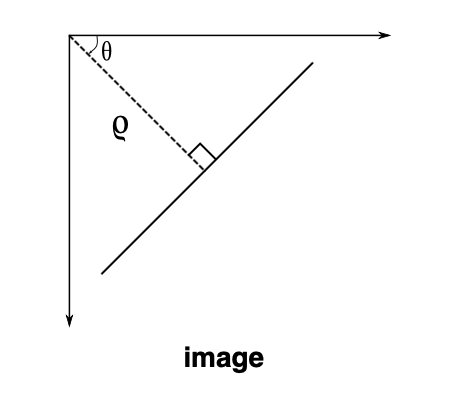
- r = 𝑥cos𝜃 + 𝑦sin𝜃 
- (r,θ) --> size of array depends on the accuracy
- 거리 r과 각도 θ에 대한 정밀로를 고려하지 않으면 array크기는 무한대로 됨.
- r은 이미지의 대각 크기로 설정하고 단위는 '1'
- θ은 0 ~ 180의 범위로 하고 단위는 '1'


- r = 𝑥cos𝜃 + 𝑦sin𝜃 식에 대해서 (𝑥, 𝑦)가 (30, 50)인 𝜃는 모든 0-180까지에 대해 r을 구하고 구해진 (r, 𝜃)에 해당하는 배열 요소의 값을 1 증가시킵니다. 물론 초기 배열의 모든 항목은 0으로 초기화되어 있겠지요. 그 다음에 다시 (𝑥, 𝑦)가 (70, 50)인 𝜃는 모든 0-180까지에 대해 r을 구하고 구해진 (r, 𝜃)에 해당하는 배열 요소의 값을 1 증가시킵니다. 결과적으로 배열의 항목 중 가장 큰 값을 찾아 보면 r=50, 𝜃=90이 되고 이미지에서 선에 대한 매개변수 정의의 값과 일치

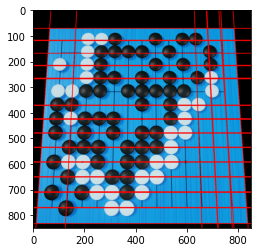

In [19]:
img = cv2.imread('/users/sejongpyo/downloads/baduk.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
# (binary image, ρ accuracy, θ accuracy, threshold)
# threshold : minimum length of line that should be detected.

# returns (rho, theta)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
    
plt.imshow(img)
plt.show()

- hough transform 알고리즘은 선을 구성하는 모든 픽셀을 대상으로 하기 때문에 퍼포먼스가 떨어짐


## Probabilistic Hough Transform
- 필요한 만큼 확률적으로 픽셀들을 선택해 연산 처리

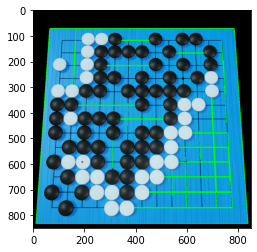

In [20]:
img = cv2.imread('/users/sejongpyo/downloads/baduk.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
# minLineLength - Minimum length of line. Line segments shorter than this are rejected.
# maxLineGap - Maximum allowed gap between line segments to treat them as a single line.

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
plt.imshow(img)
plt.show()

# Hough circle transform
- (x−xcenter)2+(y−ycenter)2=r2

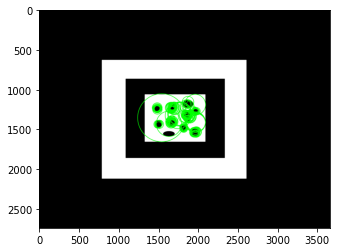

In [26]:
img = cv2.imread('/users/sejongpyo/downloads/con.jpg', 0)
img = cv2.medianBlur(img, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 5, param1 = 50,
                          param2 = 30, minRadius = 0, maxRadius = 0)

# (네번째 : 검출한 원의 중심과의 최소거리값)
# (param1 : canny edge로부터 전달되는 parameter)
# (param2 : 작으면 오류가 높고 크면 검출률이 낮아짐)
# (minRadius, maxRadius : 0으로 지정지 사용 x)

circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    # outer
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 5)
    
plt.imshow(cimg)
plt.show()